# Example usage

To use `project_python_203` in a project:

In [1]:
import project_python_203
print(project_python_203.__version__)

0.3.0


#### Package Import

In [4]:
from project_python_203.Data_treatment import *
from pybacktestchain.data_module import *
from pybacktestchain.broker import *
from project_python_203.Trades import *

#### Range of date and universe

In [6]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'INTC', 'CSCO', 'NFLX']
start_date = '2010-01-01'
end_date = '2020-01-01'
data = get_stocks_data(tickers, start_date, end_date)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2010-01-04 00:00:00-05:00,7.622500,7.660714,7.585000,7.643214,6.447412,493729600,AAPL
1,2010-01-05 00:00:00-05:00,7.664286,7.699643,7.616071,7.656429,6.458560,601904800,AAPL
2,2010-01-06 00:00:00-05:00,7.656429,7.686786,7.526786,7.534643,6.355827,552160000,AAPL
3,2010-01-07 00:00:00-05:00,7.562500,7.571429,7.466071,7.520714,6.344078,477131200,AAPL
4,2010-01-08 00:00:00-05:00,7.510714,7.571429,7.466429,7.570714,6.386256,447610800,AAPL


#### Data Treatment

In [7]:
data_treatment = Data_treatment(data)

In [8]:
MVA = data_treatment.compute_moving_average(short_window=20, long_window=100, short_type='simple', long_type='simple')
MVA

,Date,Adj Close,Volume,ticker,Short_MA,Long_MA
0,2010-01-04 00:00:00-05:00,6.447412,493729600,AAPL,NaN,NaN
1,2010-01-05 00:00:00-05:00,6.458560,601904800,AAPL,NaN,NaN
2,2010-01-06 00:00:00-05:00,6.355827,552160000,AAPL,NaN,NaN
3,2010-01-07 00:00:00-05:00,6.344078,477131200,AAPL,NaN,NaN
4,2010-01-08 00:00:00-05:00,6.386256,447610800,AAPL,NaN,NaN
...,...,...,...,...,...,...
2389,2019-12-24 00:00:00-05:00,28.350000,120820500,TSLA,24.091300,18.905800
2390,2019-12-26 00:00:00-05:00,28.729334,159508500,TSLA,24.431367,19.040880
2391,2019-12-27 00:00:00-05:00,28.691999,149185500,TSLA,24.761667,19.173967
2392,2019-12-30 00:00:00-05:00,27.646667,188796000,TSLA,25.044200,19.294820


**Plot all the Moving averages for all stocks :**

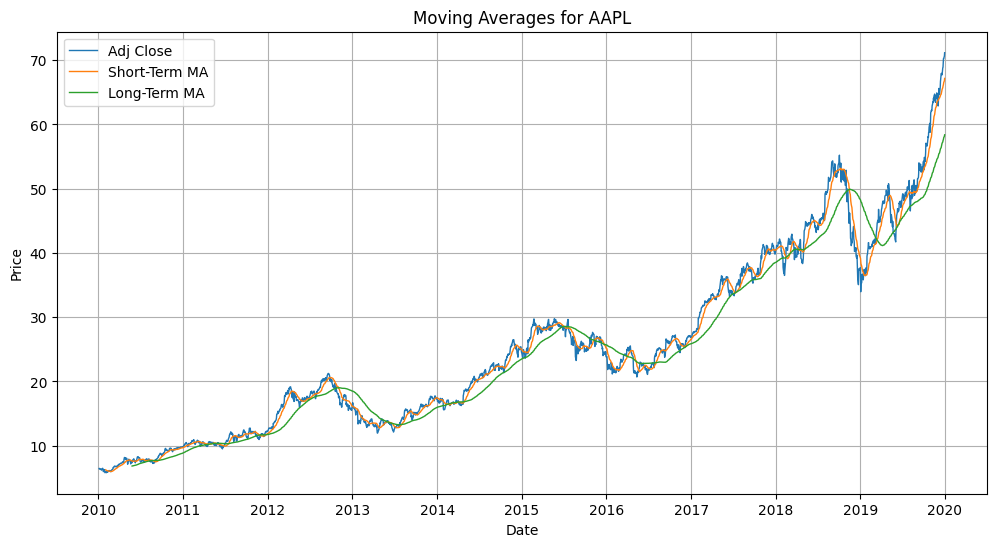

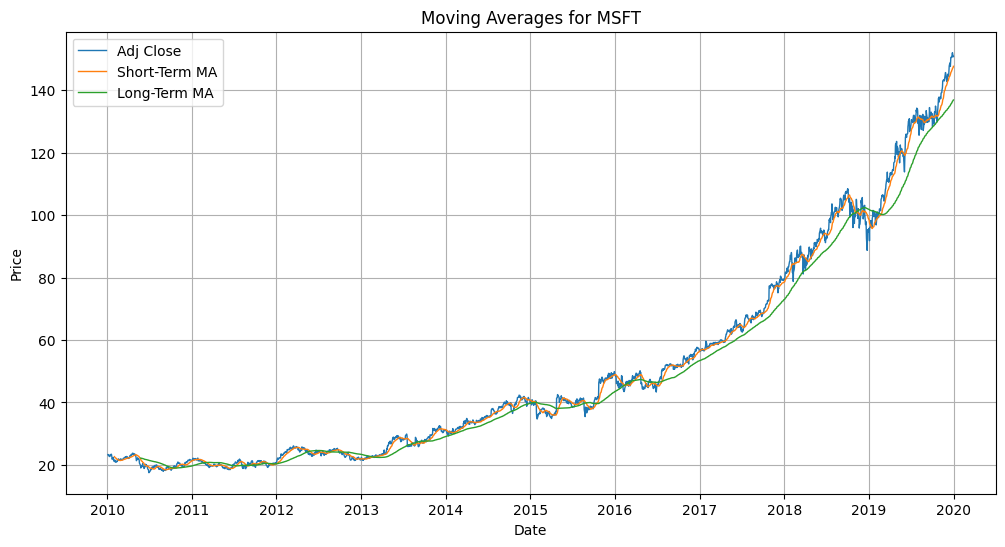

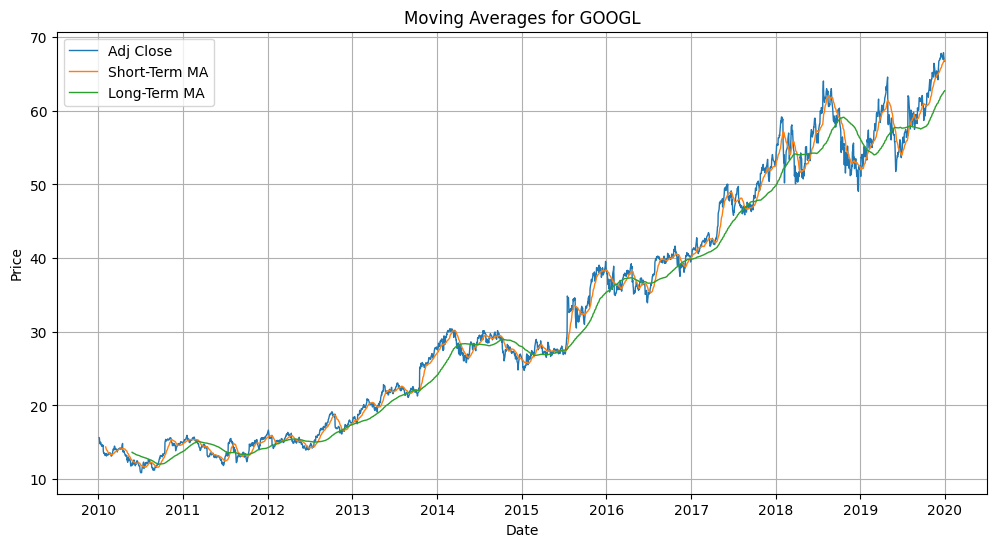

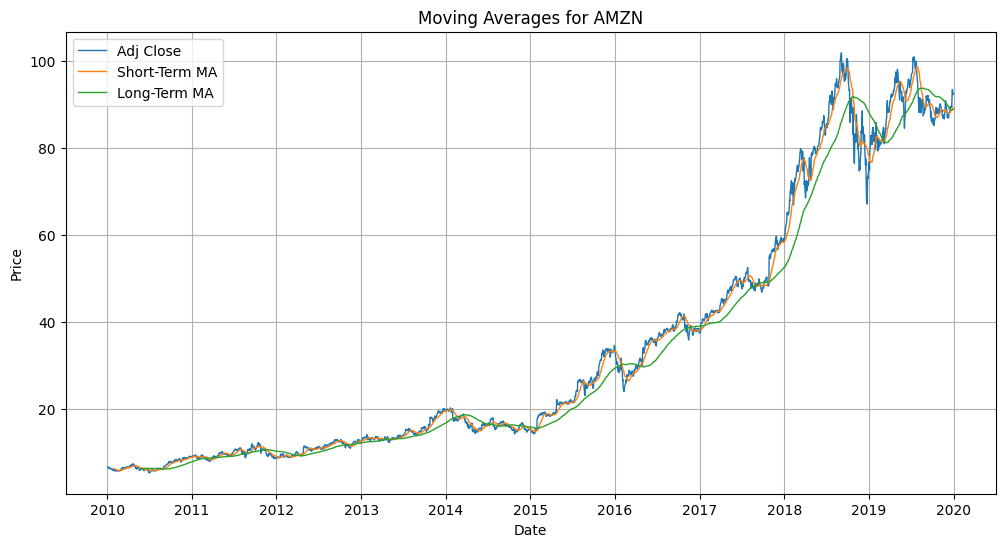

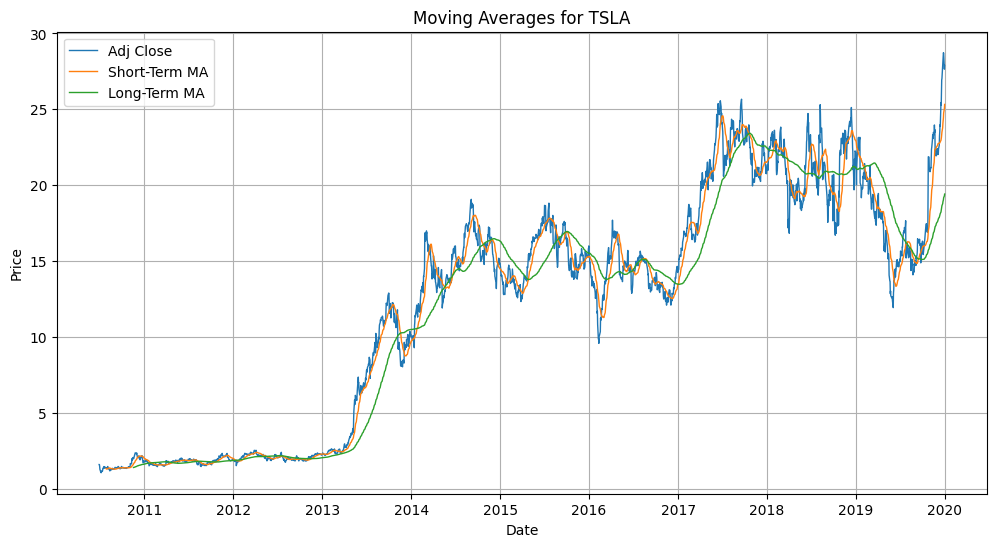

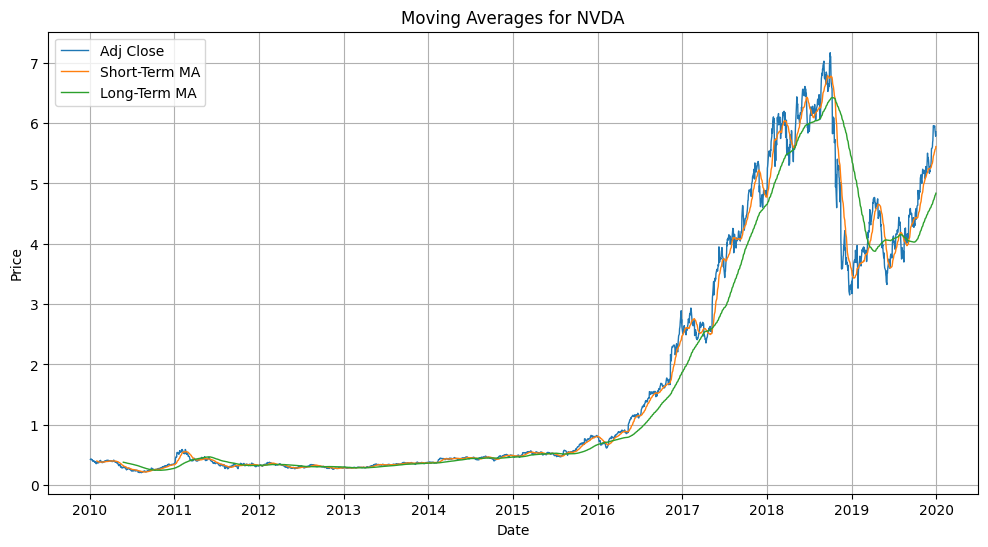

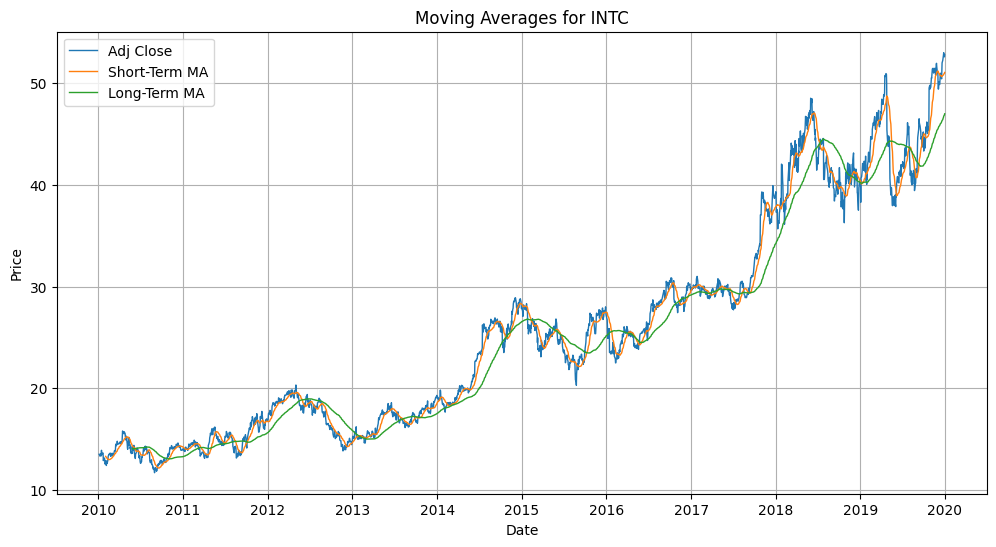

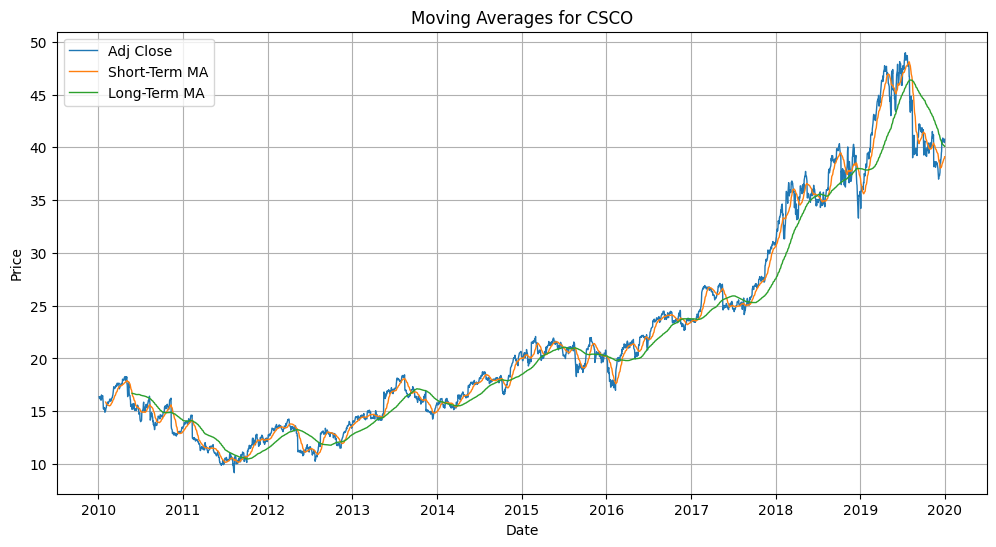

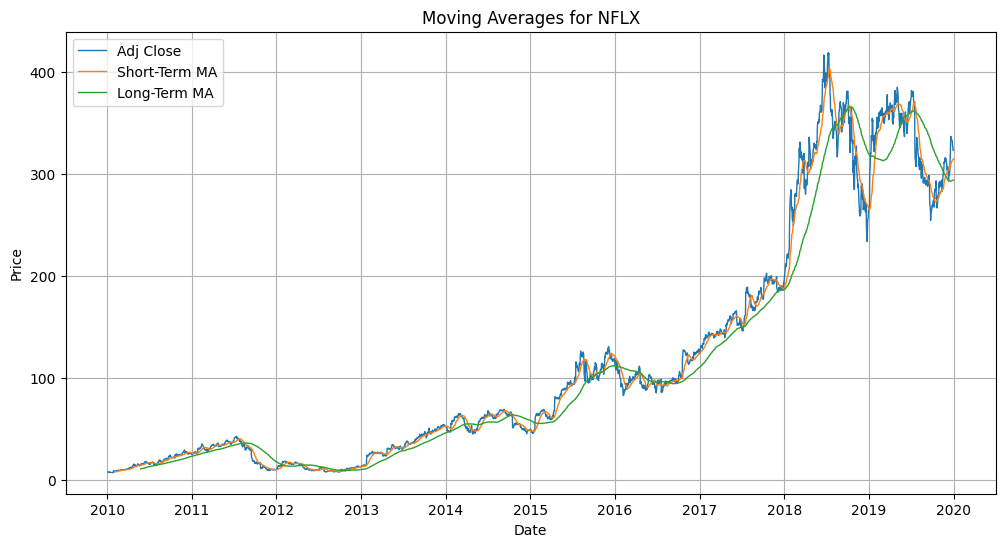

In [9]:
for ticker in tickers:
    data_treatment.plot_moving_average(ticker)

### To see the difference between exponential vs simple moving averages : 

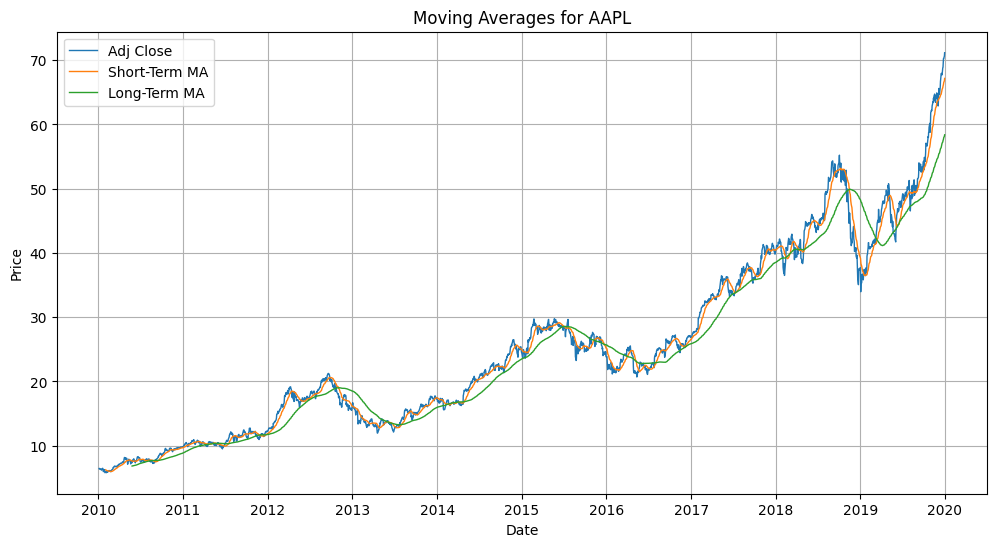

In [10]:
MVA_simple = data_treatment.compute_moving_average(short_window=20, long_window=100, short_type='simple', long_type='simple')
data_treatment.plot_moving_average('AAPL')


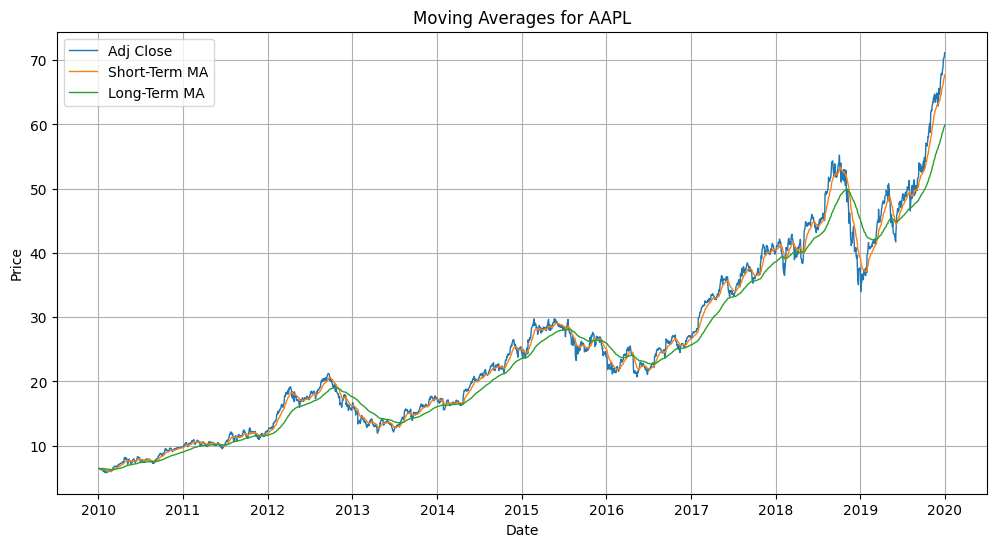

In [11]:
MVA_expo = data_treatment.compute_moving_average(short_window=20, long_window=100, short_type='exponential', long_type='exponential')
data_treatment.plot_moving_average('AAPL')


We see that the moving averages are very similar. There are small differencies in the moving averages. One of the main differences is that the simple moving average does not give data for the firsts dates since it relies on the total window of data to calculate the average. The exponential moving average (EMA), on the other hand, gives data for the firsts dates because the calculation starts from the first available price, and the EMA value is initialized as the price itself. Over time, the EMA incorporates more data and converges to a stable value as more points are added.

#### Trading Strategies and compute the buy and sell signals.

In [12]:
Trading_strat = TradingStrategy(MVA)
Trading_strat

TradingStrategy(data_MA=                          Date  Adj Close     Volume ticker   Short_MA  \
0    2010-01-04 00:00:00-05:00   6.447412  493729600   AAPL        NaN   
1    2010-01-05 00:00:00-05:00   6.458560  601904800   AAPL        NaN   
2    2010-01-06 00:00:00-05:00   6.355827  552160000   AAPL        NaN   
3    2010-01-07 00:00:00-05:00   6.344078  477131200   AAPL        NaN   
4    2010-01-08 00:00:00-05:00   6.386256  447610800   AAPL        NaN   
...                        ...        ...        ...    ...        ...   
2389 2019-12-24 00:00:00-05:00  28.350000  120820500   TSLA  24.091300   
2390 2019-12-26 00:00:00-05:00  28.729334  159508500   TSLA  24.431367   
2391 2019-12-27 00:00:00-05:00  28.691999  149185500   TSLA  24.761667   
2392 2019-12-30 00:00:00-05:00  27.646667  188796000   TSLA  25.044200   
2393 2019-12-31 00:00:00-05:00  27.888666  154285500   TSLA  25.322400   

        Long_MA  
0           NaN  
1           NaN  
2           NaN  
3           NaN

In [13]:
signals  = Trading_strat.compute_trading_signals()
signals

,Date,Adj Close,Volume,ticker,Short_MA,Long_MA,Signal,Position
0,2010-01-05 00:00:00-05:00,6.458560,601904800,AAPL,NaN,NaN,0,0.0
1,2010-01-06 00:00:00-05:00,6.355827,552160000,AAPL,NaN,NaN,0,0.0
2,2010-01-07 00:00:00-05:00,6.344078,477131200,AAPL,NaN,NaN,0,0.0
3,2010-01-08 00:00:00-05:00,6.386256,447610800,AAPL,NaN,NaN,0,0.0
4,2010-01-11 00:00:00-05:00,6.329918,462229600,AAPL,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...
22508,2019-12-24 00:00:00-05:00,28.350000,120820500,TSLA,24.091300,18.905800,1,0.0
22509,2019-12-26 00:00:00-05:00,28.729334,159508500,TSLA,24.431367,19.040880,1,0.0
22510,2019-12-27 00:00:00-05:00,28.691999,149185500,TSLA,24.761667,19.173967,1,0.0
22511,2019-12-30 00:00:00-05:00,27.646667,188796000,TSLA,25.044200,19.294820,1,0.0


**Plot all the trading signals for the given stock and time period.**

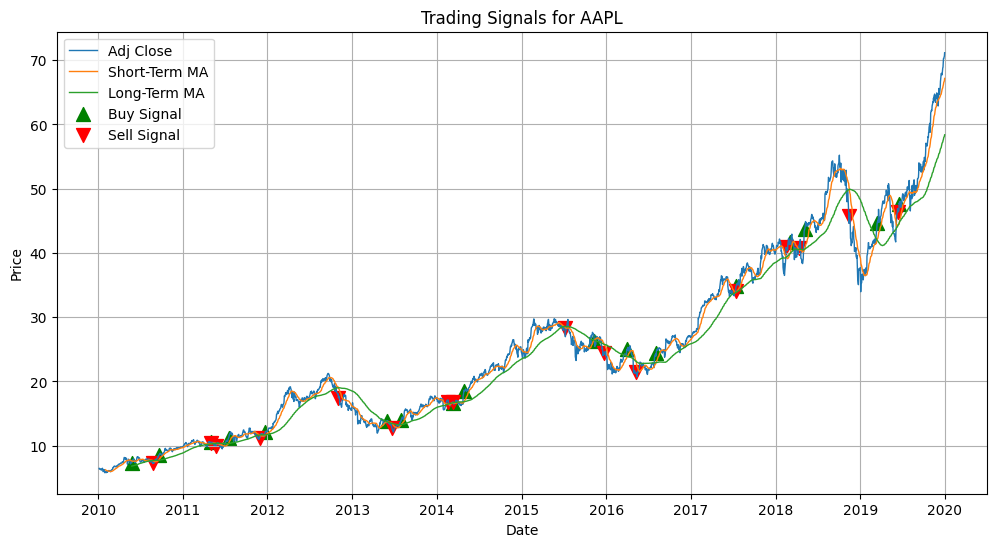

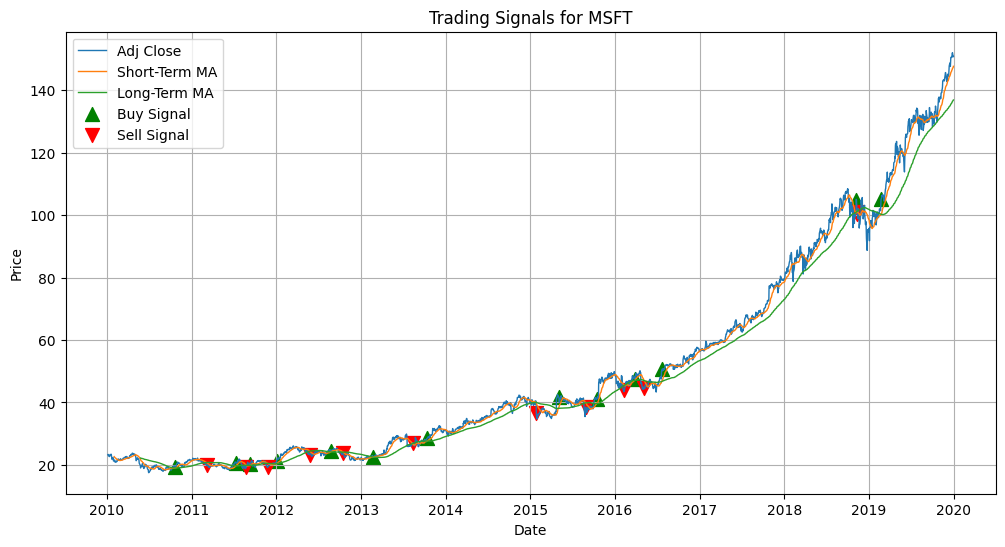

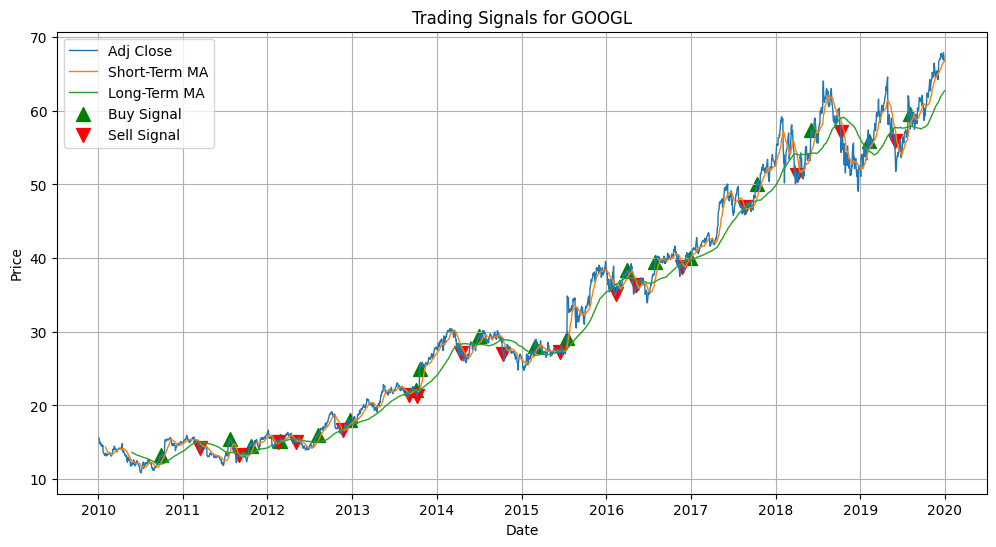

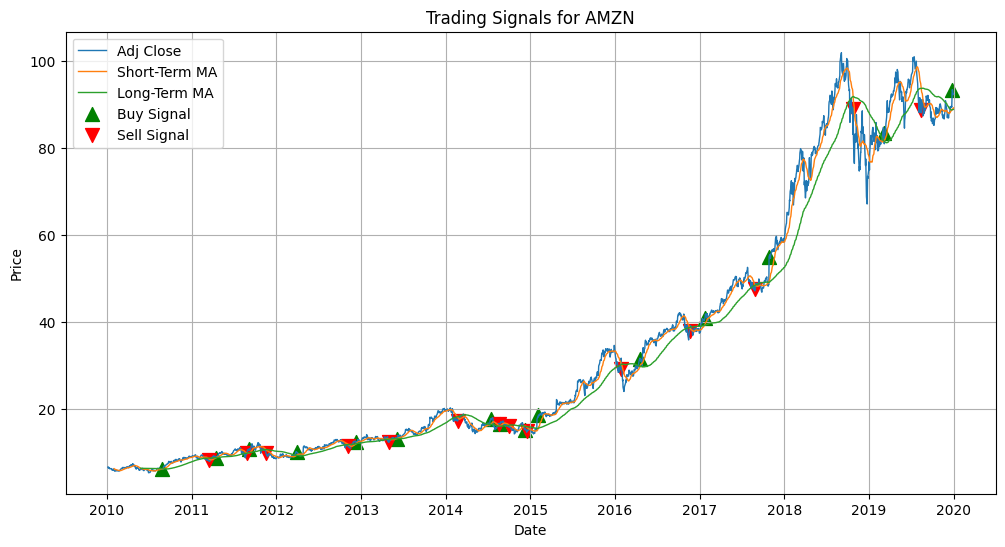

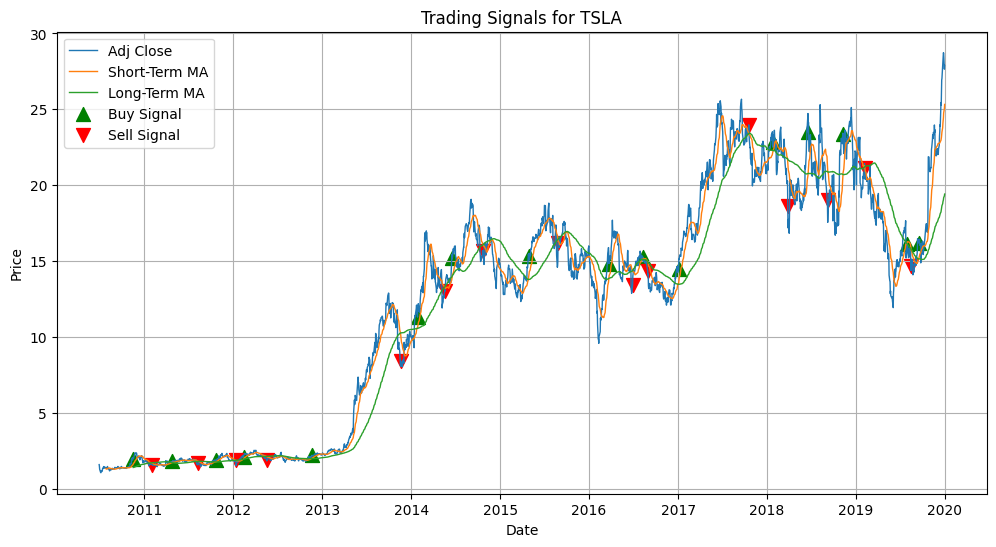

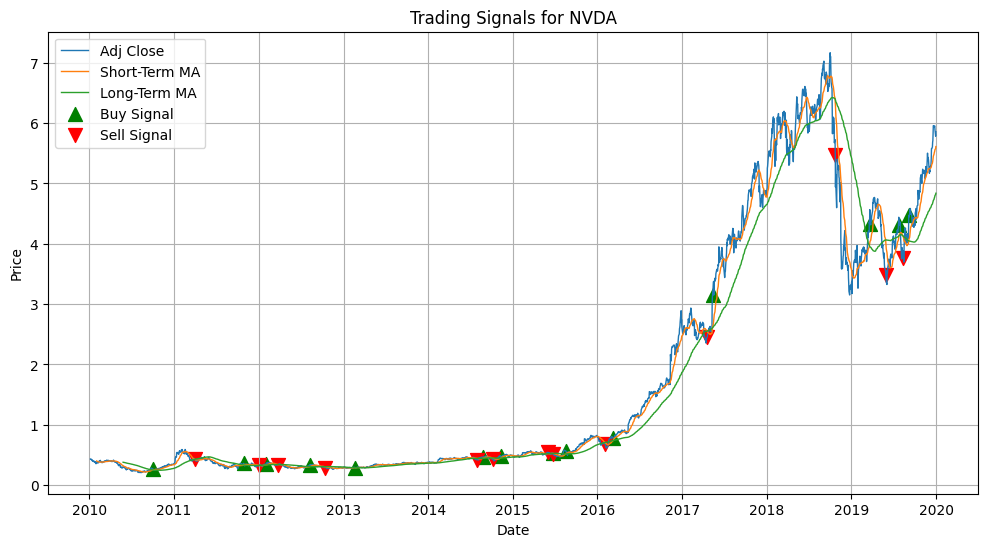

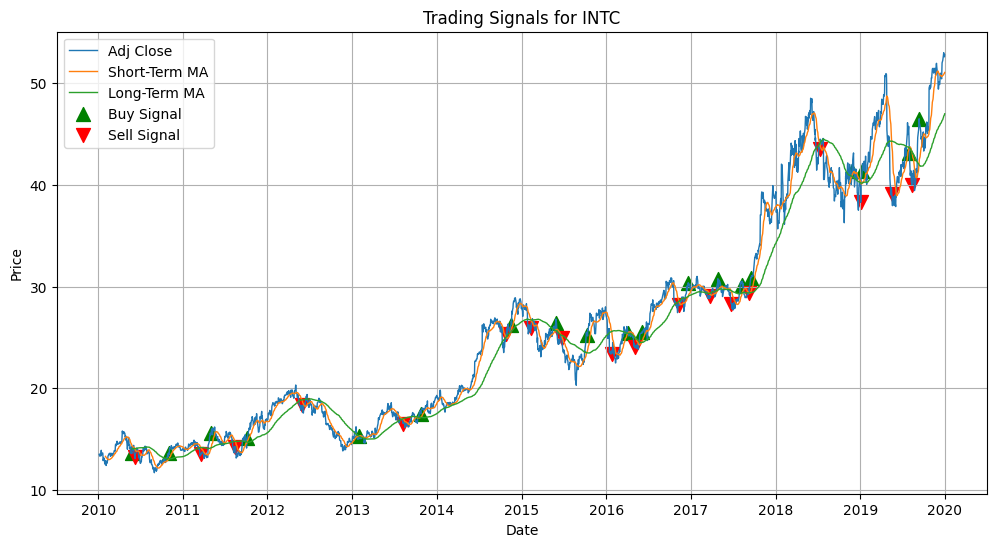

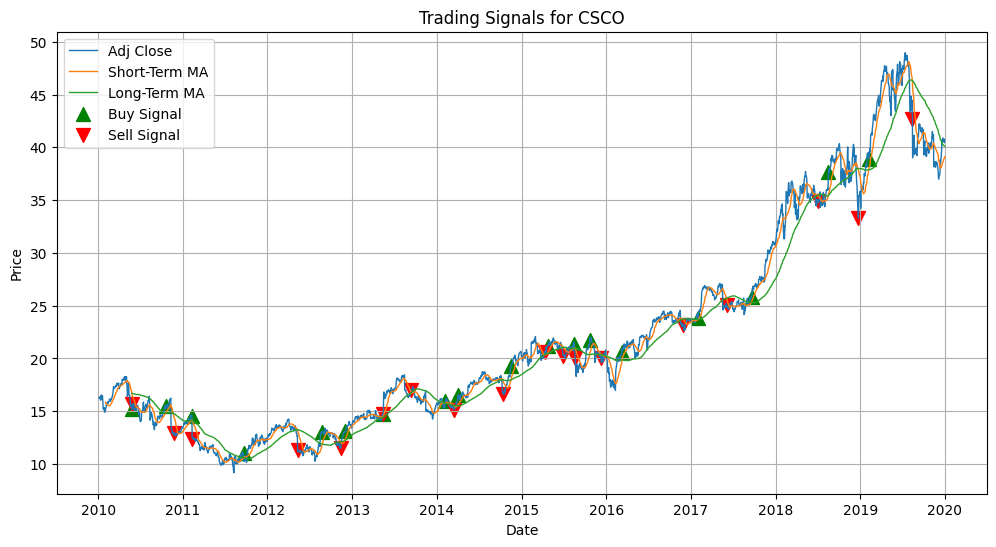

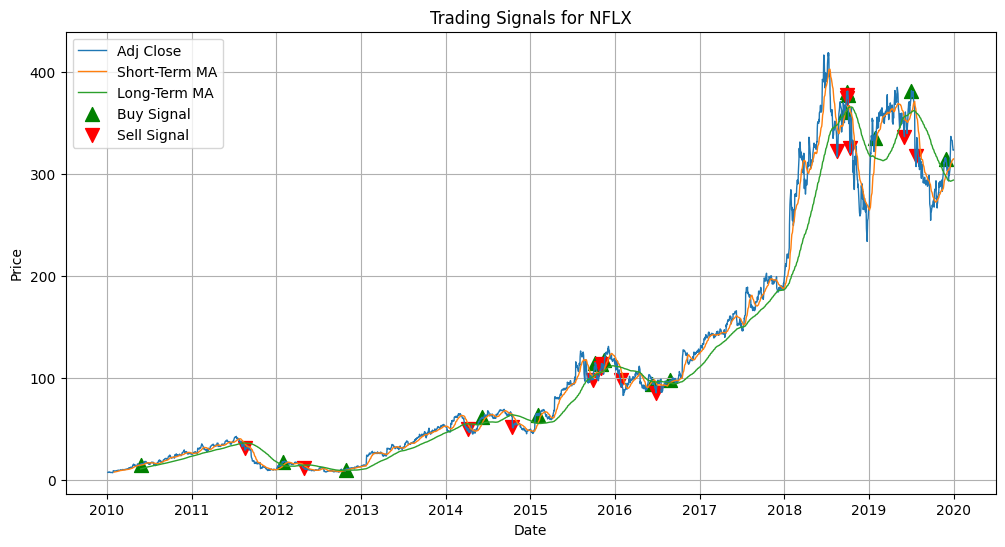

In [14]:
for ticker in tickers:
    Trading_strat.plot_trading_signals(ticker)

#### Let's try the moving average strategy : 

In [15]:
initial_cash = 10000
broker = Broker(cash=initial_cash, verbose=True)
broker


Broker(cash=10000, positions={}, transaction_log=Empty DataFrame
Columns: [Date, Action, Ticker, Quantity, Price, Cash]
Index: [], entry_prices={}, verbose=True)

In [16]:
trades = Trades(strategy=Trading_strat, broker=broker)
trades

Trades(strategy=TradingStrategy(data_MA=                           Date  Adj Close     Volume ticker   Short_MA  \
0     2010-01-05 00:00:00-05:00   6.458560  601904800   AAPL        NaN   
1     2010-01-06 00:00:00-05:00   6.355827  552160000   AAPL        NaN   
2     2010-01-07 00:00:00-05:00   6.344078  477131200   AAPL        NaN   
3     2010-01-08 00:00:00-05:00   6.386256  447610800   AAPL        NaN   
4     2010-01-11 00:00:00-05:00   6.329918  462229600   AAPL        NaN   
...                         ...        ...        ...    ...        ...   
22508 2019-12-24 00:00:00-05:00  28.350000  120820500   TSLA  24.091300   
22509 2019-12-26 00:00:00-05:00  28.729334  159508500   TSLA  24.431367   
22510 2019-12-27 00:00:00-05:00  28.691999  149185500   TSLA  24.761667   
22511 2019-12-30 00:00:00-05:00  27.646667  188796000   TSLA  25.044200   
22512 2019-12-31 00:00:00-05:00  27.888666  154285500   TSLA  25.322400   

         Long_MA  Signal  Position  
0            NaN      

**We can filter for any date, to see if there is a buy or sell signal.**  
The Buy or Sell signal is determined in the `Signal`column : 
* 1 : you need to be long the stock 
* 0 : you need to be short the stock

We then have the `Position`column that tells us when to buy or sell the stock : 
* 1 : you need to buy the stock 
* -1 : you need to sell the stock


In [17]:
# Filter the signals DataFrame for the specified date
date = '2010-05-28' # Date format: 'YYYY-MM-DD'
filtered_signals = signals[signals['Date'] == date]
filtered_signals

,Date,Adj Close,Volume,ticker,Short_MA,Long_MA,Signal,Position
100,2010-05-28 00:00:00-04:00,7.738941,815614800,AAPL,7.575701,6.849941,1,0.0
2615,2010-05-28 00:00:00-04:00,6.273000,79096000,AMZN,6.380300,6.460040,0,0.0
5130,2010-05-28 00:00:00-04:00,15.349816,56435900,CSCO,16.463609,16.678613,0,0.0
7645,2010-05-28 00:00:00-04:00,12.109006,115676208,GOOGL,12.400817,13.577983,0,0.0
10160,2010-05-28 00:00:00-04:00,14.078612,72712600,INTC,14.293834,14.054721,1,0.0
12675,2010-05-28 00:00:00-04:00,19.602390,67496900,MSFT,21.307790,22.111076,0,0.0
15190,2010-05-28 00:00:00-04:00,15.878571,28188300,NFLX,14.558714,10.942514,1,0.0
17705,2010-05-28 00:00:00-04:00,0.301262,545116000,NVDA,0.311969,0.375141,0,0.0


**We can also consider that the `Adj Close` is the market value of the stock at the end of the trading day.**

In [18]:
# Convert to dictionary with the tickers as keys and the adjusted close prices as values for a given date
market_val = dict(zip(filtered_signals['ticker'], filtered_signals['Adj Close']))
market_val


{'AAPL': 7.738940715789795,
 'AMZN': 6.2729997634887695,
 'CSCO': 15.34981632232666,
 'GOOGL': 12.10900592803955,
 'INTC': 14.078612327575684,
 'MSFT': 19.60239028930664,
 'NFLX': 15.878570556640625,
 'NVDA': 0.30126243829727173}

**Let's run the moving average strategy over the specified time period and see how it performs :**

In [19]:
trades_ex, ptf_val = trades.execute_trades(signals)

# Display the executed trades
print('Executed trades:')
display(trades_ex)
print('Portfolio value:')
display(ptf_val)

/Users/jeandeslis/Desktop/Cours M2 203/S1/Python/Projet/pybacktestchain/src/pybacktestchain/broker.py:115: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.transaction_log = pd.concat([self.transaction_log, transaction], ignore_index=True)


Executed trades:


,Date,Action,Ticker,Quantity,Price,Cash
0,2010-05-26 00:00:00-04:00,BUY,AAPL,271,7.354225,8007.005111
1,2010-05-26 00:00:00-04:00,BUY,CSCO,131,15.170873,6019.620789
2,2010-05-26 00:00:00-04:00,BUY,INTC,147,13.605381,4019.629780
3,2010-05-26 00:00:00-04:00,BUY,NFLX,133,14.971429,2028.429740
4,2010-05-27 00:00:00-04:00,SELL,CSCO,131,15.687838,4083.536466
...,...,...,...,...,...,...
218,2019-08-15 00:00:00-04:00,SELL,AMZN,1,88.806000,42352.867528
219,2019-08-16 00:00:00-04:00,SELL,TSLA,808,14.662667,54200.302686
220,2019-09-05 00:00:00-04:00,BUY,NVDA,4675,4.471443,33296.308066
221,2019-09-12 00:00:00-04:00,BUY,INTC,454,46.503746,12183.607367


Portfolio value:


,Date,Portfolio Value
0,2010-01-05 00:00:00-05:00,10000.000000
1,2010-01-06 00:00:00-05:00,10000.000000
2,2010-01-07 00:00:00-05:00,10000.000000
3,2010-01-08 00:00:00-05:00,10000.000000
4,2010-01-11 00:00:00-05:00,10000.000000
...,...,...
2510,2019-12-24 00:00:00-05:00,134711.826758
2511,2019-12-26 00:00:00-05:00,136110.561165
2512,2019-12-27 00:00:00-05:00,135958.451497
2513,2019-12-30 00:00:00-05:00,134397.260185


**Check the final position of the broker:**

In [20]:
broker.positions

{'MSFT': Position(ticker='MSFT', quantity=196, entry_price=105.04134368896484),
 'AAPL': Position(ticker='AAPL', quantity=469, entry_price=47.63334655761719),
 'NVDA': Position(ticker='NVDA', quantity=4675, entry_price=4.471442699432373),
 'INTC': Position(ticker='INTC', quantity=454, entry_price=46.503746032714844),
 'TSLA': Position(ticker='TSLA', quantity=752, entry_price=16.187332153320312)}

#### Run a backtest, that does all the above steps in one go :

In [21]:
backtest = MyBacktest(
    initial_date=datetime(2010, 1, 1),
    final_date=datetime(2020, 1, 1),
    universe = ['AAPL', 'MSFT', 'GOOGL'],
    initial_cash=10000,
    short_window=20,
    long_window=100,
    short_type='simple',
    long_type='simple'
)

backtest.run_backtest()

INFO:root:Running backtest from 2010-01-01 00:00:00 to 2020-01-01 00:00:00.
INFO:root:Retrieving price data for universe


/Users/jeandeslis/opt/anaconda3/envs/pybacktestchain/lib/python3.12/site-packages/project_python_203/Data_treatment.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_MA['Signal'] = 0
/Users/jeandeslis/opt/anaconda3/envs/pybacktestchain/lib/python3.12/site-packages/project_python_203/Data_treatment.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data_MA['Signal'] = (self.data_MA['Short_MA'] > self.data_MA['Long_MA']).astype(int)
/Users/jeandeslis/opt/anaconda3/envs/pybacktestchain/li

(                        Date Action Ticker Quantity      Price          Cash
 0  2010-05-26 00:00:00-04:00    BUY   AAPL    27195   7.354225  8.000019e+05
 1  2010-08-24 00:00:00-04:00   SELL   AAPL    27195   7.228297  9.965754e+05
 2  2010-09-20 00:00:00-04:00    BUY   AAPL    23358   8.532782  7.972667e+05
 3  2010-09-27 00:00:00-04:00    BUY  GOOGL    15154  13.225580  5.968462e+05
 4  2010-10-22 00:00:00-04:00    BUY   MSFT    10777  19.386147  3.879217e+05
 ..                       ...    ...    ...      ...        ...           ...
 88 2019-03-15 00:00:00-04:00    BUY   AAPL     8509  44.632874  7.367387e+05
 89 2019-05-30 00:00:00-04:00   SELL  GOOGL     6650  55.867973  1.108261e+06
 90 2019-06-14 00:00:00-04:00   SELL   AAPL     8509  46.398396  1.503065e+06
 91 2019-06-19 00:00:00-04:00    BUY   AAPL     8225  47.633347  1.111280e+06
 92 2019-08-02 00:00:00-04:00    BUY  GOOGL     6628  59.599945  7.162520e+05
 
 [93 rows x 6 columns],
                           Date  Portf